<a href="https://colab.research.google.com/github/namnitha/CE888-Data-Science/blob/master/Lab7/Exercise2_NewDataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

os.environ['KAGGLE_USERNAME'] = "namnitha" 

os.environ['KAGGLE_KEY'] = "90ceb5b09eaa184f556d4577eb017b49" 

!kaggle datasets download -d pmigdal/alien-vs-predator-images

  0% 0.00/14.1M [00:00<?, ?B/s]
100% 14.1M/14.1M [00:00<00:00, 129MB/s]


In [0]:
!ls

alien-vs-predator-images.zip  sample_data


In [0]:
from zipfile import ZipFile

file_name = "/content/alien-vs-predator-images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
train_dir = "/content/data/train"
validation_dir = '/content/data/validation'

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)




Epoch 1/30





100/100 [==============================] - 19s 190ms/step - loss: 0.6468 - acc: 0.6191 - val_loss: 0.5901 - val_acc: 0.6600
Epoch 2/30
100/100 [==============================] - 3s 32ms/step - loss: 0.5420 - acc: 0.7237 - val_loss: 0.5152 - val_acc: 0.7450
Epoch 3/30
100/100 [==============================] - 3s 31ms/step - loss: 0.4661 - acc: 0.7841 - val_loss: 0.4830 - val_acc: 0.7900
Epoch 4/30
100/100 [==============================] - 3s 33ms/step - loss: 0.4117 - acc: 0.8136 - val_loss: 0.4898 - val_acc: 0.7300
Epoch 5/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3657 - acc: 0.8479 - val_loss: 0.6399 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3131 - acc: 0.8654 - val_loss: 0.4558 - val_acc: 0.7800
Epoch 7/30
100/100 [==============================] - 3s 34ms/step - loss: 0.2691 - acc: 0.8851 - val_loss: 0.4617 - val_acc: 0.7800
Epoch 8/30
100/100 [==============================] - 3s 33

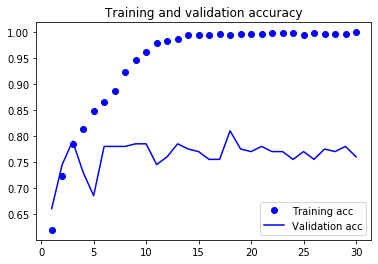

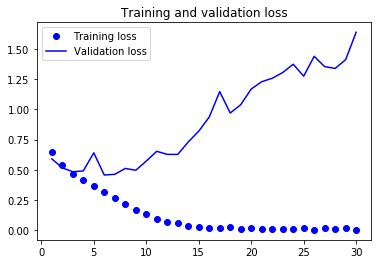

In [0]:
model.save('Alien_vs_Predator_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##CNN with dropout


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 22s 215ms/step - loss: 0.6355 - acc: 0.6266 - val_loss: 0.6731 - val_acc: 0.5628
Epoch 2/20
100/100 [==============================] - 19s 193ms/step - loss: 0.5884 - acc: 0.6824 - val_loss: 0.7806 - val_acc: 0.5824
Epoch 3/20
100/100 [==============================] - 19s 194ms/step - loss: 0.5625 - acc: 0.7089 - val_loss: 0.5902 - val_acc: 0.6369
Epoch 4/20
100/100 [==============================] - 20s 197ms/step - loss: 0.5301 - acc: 0.7373 - val_loss: 0.5325 - val_acc: 0.6892
Epoch 5/20
100/100 [==============================] - 19s 190ms/step - loss: 0.5144 - acc: 0.7461 - val_loss: 0.5568 - val_acc: 0.6885
Epoch 6/20
100/100 [==============================] - 20s 203ms/step - loss: 0.5063 - acc: 0.7532 - val_loss: 0.5206 - val_acc: 0.7151
Epoch 7/20
100/100 [==============================] - 19s 189ms/step - loss: 0.4903 - acc: 0.7529 - val_loss

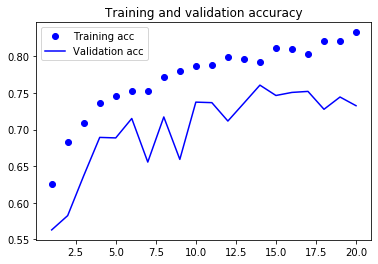

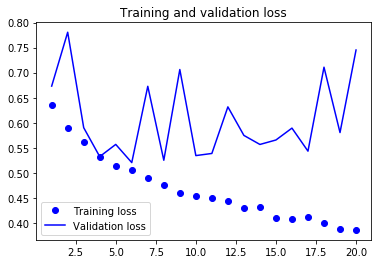

In [0]:
model.save('Alien_vs_Predator_2.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()